In [1]:
from random import random
import matplotlib.pyplot as plt
import pymysql

In [12]:
conexao = pymysql.connect(host='db4free.net', user='vanderson', passwd='Vfs@001122', db='teste_vanderson')
cursor = conexao.cursor()
cursor.execute('SELECT * FROM produtos')
for produto in cursor:
    print(produto[1])
cursor.close()
conexao.close()

Geladeira Dako
Iphone 6
TV 55
TV 50
TV 42
Notebook Dell
Ventilador Panasonic
Microondas Electrolux
Microondas LG
Microondas Panasonic
Geladeira Brastemp
Geladeira Consul
Notebook Lenovo
Notebook Asus


In [45]:
class Produto():
    def __init__(self, nome, espaco, valor):
        self.nome = nome
        self.valor = valor
        self.espaco = espaco

In [46]:
lista_produtos = []
lista_produtos.append(Produto("Geladeira Dako", 0.751, 999.90))
lista_produtos.append(Produto("Iphone 6", 0.0000899, 2911.12))
lista_produtos.append(Produto("TV 55' ", 0.400, 4346.99))
lista_produtos.append(Produto("TV 50' ", 0.290, 3999.90))
lista_produtos.append(Produto("TV 42' ", 0.200, 2999.00))
lista_produtos.append(Produto("Notebook Dell", 0.00350, 2499.90))
lista_produtos.append(Produto("Ventilador Panasonic", 0.496, 199.90))
lista_produtos.append(Produto("Microondas Electrolux", 0.0424, 308.66))
lista_produtos.append(Produto("Microondas LG", 0.0544, 429.90))
lista_produtos.append(Produto("Microondas Panasonic", 0.0319, 299.29))
lista_produtos.append(Produto("Geladeira Brastemp", 0.635, 849.00))
lista_produtos.append(Produto("Geladeira Consul", 0.870, 1199.89))
lista_produtos.append(Produto("Notebook Lenovo", 0.498, 1999.90))
lista_produtos.append(Produto("Notebook Asus", 0.527, 3999.00))

In [47]:
 for produto in lista_produtos:
        print(produto.nome)

Geladeira Dako
Iphone 6
TV 55' 
TV 50' 
TV 42' 
Notebook Dell
Ventilador Panasonic
Microondas Electrolux
Microondas LG
Microondas Panasonic
Geladeira Brastemp
Geladeira Consul
Notebook Lenovo
Notebook Asus


In [117]:
class Individuo():
    def __init__(self, espacos, valores, limite_espacos, geracao=0):
        self.espacos = espacos
        self.valores = valores
        self.limite_espacos= limite_espacos
        self.geracao = geracao
        self.nota_avaliacao = 0
        self.cromossomo = []
        self.espaco_usado = 0
        for i in range(len(espacos)):
            if random() < 0.5:
                self.cromossomo.append(0)
            else:
                self.cromossomo.append(1)
                
    def avaliacao(self):
        nota = 0
        soma_espacos = 0
        for i in range(len(self.cromossomo)):
            if self.cromossomo[i] == 1:
                nota += self.valores[i]
                soma_espacos += self.espacos[i]
            if soma_espacos > self.limite_espacos:
                nota = 1
        self.nota_avaliacao = nota
        self.espaco_usado = soma_espacos
        
    def crossover(self, outro_individuo):
        corte = round(random()  * len(self.cromossomo))
        
        filho1 = outro_individuo.cromossomo[0:corte] + self.cromossomo[corte::]
        filho2 = self.cromossomo[0:corte] + outro_individuo.cromossomo[corte::]
        
        filhos = [Individuo(self.espacos, self.valores, self.limite_espacos, self.geracao + 1),
                  Individuo(self.espacos, self.valores, self.limite_espacos, self.geracao + 1)]
        filhos[0].cromossomo = filho1
        filhos[1].cromossomo = filho2
        return filhos
    
    def mutacao(self, taxa_mutacao):
        for i in range(len(self.cromossomo)):
            if random() < taxa_mutacao:
                if self.cromossomo[i] == '1':
                    self.cromossomo[i] = '0'
                else:
                    self.cromossomo[i] = '1'
        return self

In [136]:
class Algoritmogenetico():
    def __init__(self, tamanhoPopulacao):
        self.tamanhoPopulacao = tamanhoPopulacao
        self.populacao = []
        self.geracao = 0
        self.melhorsolucao = 0
        self.lista_solucoes = []
    def inicilizaPopulacao(self, espacos, valores, limite_espacos):
        for i in range(self.tamanhoPopulacao):
            self.populacao.append(Individuo(espacos, valores, limite_espacos))
        self.melhorsolucao = self.populacao[0]
    
    def ordenaPopulacao(self):
        self.populacao = sorted(self.populacao, key = lambda populacao : populacao.nota_avaliacao,
                               reverse = True)
    def melhorIndividuo(self, individuo):
        if individuo.nota_avaliacao > self.melhorsolucao.nota_avaliacao:
            self.melhorsolucao = individuo
    
    def somaAvaliacoes(self):
        soma = 0
        for individuo in self.populacao:
            soma += individuo.nota_avaliacao
        return soma
    
    def selecionaPai(self, soma_avaliacao):
        pai = -1
        valor_sorteado = random() * soma_avaliacao
        soma = 0
        i = 0
        while i < len(self.populacao) and soma < valor_sorteado:
            soma += self.populacao[i].nota_avaliacao
            pai += 1
            i += 1
        return pai
    
    def visualizaGeracao(self):
        melhor = self.populacao[0]
        print('Geracao: %s' % self.populacao[0].geracao)
        print('Melhor solucao pro problema: %s' % melhor.cromossomo,
     '\nNota = %s' % melhor.nota_avaliacao, 
     '\nTamanho = %s' % melhor.espaco_usado)
    
    def resolver(self, taxa_mutacao, numero_geracoes, espacos, valores, limite_espacos):
        self.inicilizaPopulacao(espacos, valores, limite_espacos)
        
        for individuo in self.populacao:
            individuo.avaliacao()
        self.ordenaPopulacao()
        self.melhorsolucao = self.populacao[0]
        self.lista_solucoes.append(self.melhorsolucao.nota_avaliacao)
        self.visualizaGeracao()
        
        for geracao in range(numero_geracoes):
            soma_avaliacao = self.somaAvaliacoes()
            nova_populacao = []
            
            for individuos_gerados in range(0, self.tamanhoPopulacao):
                pai1 = self.selecionaPai(soma_avaliacao)
                pai2 = self.selecionaPai(soma_avaliacao)
                
                filhos = self.populacao[pai1].crossover(self.populacao[pai2])
                nova_populacao.append(filhos[0].mutacao(taxa_mutacao))
                nova_populacao.append(filhos[1].mutacao(taxa_mutacao))
                                      
            self.populacao = nova_populacao
            for individuo in self.populacao:
                individuo.avaliacao()
            self.ordenaPopulacao()
            self.visualizaGeracao()
            self.melhorIndividuo(self.populacao[0])
            self.lista_solucoes.append(self.populacao[0].nota_avaliacao)

        print('Melhor solucao pro problema: %s' % self.melhorsolucao.geracao, '\nNota = %s' % self.melhorsolucao.nota_avaliacao, '\nTamanho = %s' % self.melhorsolucao.espaco_usado,
     '\nCromossomo = %s' % self.melhorsolucao.cromossomo)
        return self.melhorsolucao.cromossomo

In [64]:

espacos = []
    valores = []
    nomes = []
    for produto in lista_produtos:
        espacos.append(produto.espaco)
        valores.append(produto.valor)
        nomes.append(produto.nome)

In [65]:
    limite = 3
    
    individuo1 = Individuo(espacos, valores, limite)

In [66]:
print("Espaços = %s" % str(individuo1.espacos))
print("Valores = %s" % str(individuo1.valores))
print("Cromossomo = %s" % str(individuo1.cromossomo))

Espaços = [0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527]
Valores = [999.9, 2911.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0]
Cromossomo = [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0]


In [67]:
print("\n Individuo")
for i in range(len(lista_produtos)):
    if individuo1.cromossomo[i] == 1:
        print("Nome: %s R$ %s " % (lista_produtos[i].nome, lista_produtos[i].valor))
        
    individuo1.avaliacao()
print("Nota = %s" % individuo1.nota_avaliacao)
print("Espaço usado = %s" % individuo1.espaco_usado)


 Individuo
Nome: Iphone 6 R$ 2911.12 
Nome: Notebook Dell R$ 2499.9 
Nome: Ventilador Panasonic R$ 199.9 
Nome: Microondas Electrolux R$ 308.66 
Nome: Geladeira Brastemp R$ 849.0 
Nome: Notebook Lenovo R$ 1999.9 
Nota = 8768.48
Espaço usado = 1.6749899000000001


In [68]:
individuo2 = Individuo(espacos, valores, limite)
print("\n Individuo 2")
for i in range(len(lista_produtos)):
    if individuo2.cromossomo[i] == 1:
        print("Nome: %s R$ %s " % (lista_produtos[i].nome, lista_produtos[i].valor))
        
individuo2.avaliacao()
print("Nota = %s" % individuo2.nota_avaliacao)
print("Espaço usado = %s" % individuo2.espaco_usado)

individuo1.crossover(individuo2)
individuo1.mutacao(0.05)
individuo2.mutacao(0.05)


 Individuo 2
Nome: Geladeira Dako R$ 999.9 
Nome: TV 55'  R$ 4346.99 
Nome: TV 42'  R$ 2999.0 
Nome: Notebook Dell R$ 2499.9 
Nome: Ventilador Panasonic R$ 199.9 
Nome: Microondas Electrolux R$ 308.66 
Nome: Notebook Asus R$ 3999.0 
Nota = 15353.349999999999
Espaço usado = 2.4199
Antes [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0] 
Depois ['1', 1, '1', 0, '1', 1, 1, 1, 0, 0, 1, 0, 1, 0] 
Antes [1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1] 
Depois [1, 0, 1, 0, 1, 1, 1, 1, 0, '1', 0, 0, 0, 1] 


In [101]:
tamanho_populacao = 20
ag = Algoritmogenetico(tamanho_populacao)
ag.inicilizaPopulacao(espacos, valores, limite)
for individuo in ag.populacao:
    individuo.avaliacao()

ag.ordenaPopulacao()

ag.melhorIndividuo(ag.populacao[0])

soma = ag.somaAvaliacoes()

nova_populacao = []
probabilidade_mutacao = 0.01

for individuos_gerados in range(0, ag.tamanhoPopulacao, 2):
    pai1 = ag.selecionaPai(soma)
    pai2 = ag.selecionaPai(soma)
    
    filhos = ag.populacao[pai1].crossover(ag.populacao[pai2])
    
    nova_populacao.append(filhos[0].mutacao(probabilidade_mutacao))
    nova_populacao.append(filhos[1].mutacao(probabilidade_mutacao))

ag.populacao = list(nova_populacao)
for individuo in ag.populacao:
    individuo.avaliacao()
ag.ordenaPopulacao()
ag.melhorIndividuo(ag.populacao[0])
ag.somaAvaliacoes()

Antes [0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1] 
Depois [0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1] 
Antes [0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0] 
Depois [0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0] 
Antes [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1] 
Depois [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1] 
Antes [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1] 
Depois [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1] 
Antes [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0] 
Depois [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0] 
Antes [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1] 
Depois [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1] 
Antes [1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1] 
Depois [1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1] 
Antes [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0] 
Depois [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0] 
Antes [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1] 
Depois [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1] 
Antes [1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1] 
Depois [1, 1, 0, 1, 0, 0, '1', 1, 0, 0, 0

239277.33999999997

In [102]:
print('Melhor solucao pro problema: %s' % ag.melhorsolucao.cromossomo,
     '\nNota = %s' % ag.melhorsolucao.nota_avaliacao, 
     '\nTamanho = %s' % ag.melhorsolucao.espaco_usado)
print('Soma das avaliacoes = %s' % soma)

Melhor solucao pro problema: [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1] 
Nota = 21055.2 
Tamanho = 1.4524899
Soma das avaliacoes = 241082.05


In [146]:
tamanho_populacao = 20
taxa_mutacao = 0.02
numero_geracoes = 100
ag = Algoritmogenetico(tamanho_populacao)
resultado = ag.resolver(taxa_mutacao, numero_geracoes, espacos, valores, limite)
for i in range(len(lista_produtos)):
    if resultado[i] == 1:
        print("Nome: %s R$ %s " % (lista_produtos[i].nome, lista_produtos[i].valor))

Geracao: 0
Melhor solucao pro problema: [0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1] 
Nota = 20885.71 
Tamanho = 2.4654899
Geracao: 1
Melhor solucao pro problema: [0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1] 
Nota = 19973.769999999997 
Tamanho = 2.8728000000000002
Geracao: 2
Melhor solucao pro problema: [0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1] 
Nota = 20885.71 
Tamanho = 2.4654899
Geracao: 3
Melhor solucao pro problema: [0, 1, 1, 1, 1, '1', 0, 1, 0, 0, 1, 1, 1, 0] 
Nota = 18614.460000000003 
Tamanho = 2.9354899000000003
Geracao: 4
Melhor solucao pro problema: ['1', 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1] 
Nota = 20985.100000000002 
Tamanho = 2.0013899
Geracao: 5
Melhor solucao pro problema: ['1', 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1] 
Nota = 21534.81 
Tamanho = 2.6044899
Geracao: 6
Melhor solucao pro problema: ['1', 1, 1, 1, 1, 0, 0, 1, 0, 0, '1', 1, 1, 1] 
Nota = 21764.46 
Tamanho = 2.8274899
Geracao: 7
Melhor solucao pro problema: ['1', 1, 1, 1, 1, 0, '1', 0, 1, '1', 0, 1, 1, 1] 
Nota 

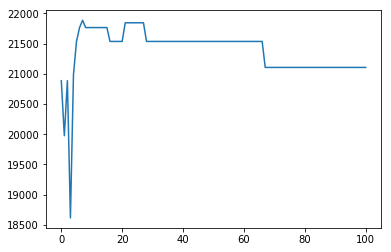

In [147]:
plt.plot(ag.lista_solucoes)
plt.show()